In [2]:
import os
import torch
import os
import matplotlib.pyplot as plt
import cv2
import scipy
import numpy as np
from PIL import Image

In [3]:
from IPython import display
display.clear_output()

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 687.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.0/757.0 kB 5.7 MB/s eta 0:00:00a 0:00:01


# Train

In [6]:
from ultralytics import YOLO

In [5]:
DATA_DIR = '/kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8/' #directory with data.yaml configuration file

In [6]:
with open(f'{DATA_DIR}data.yaml', 'r') as f:
    print(f.read())

train: ./train/images
val: ./valid/images
test: ./test/images

nc: 3
names: ['Megafon', 'Opponents', 'Yota']

roboflow:
  workspace: d2j3dspace1
  project: posm_materials_dataset
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/d2j3dspace1/posm_materials_dataset/dataset/3



In [8]:
# Load a model
model = YOLO("yolov8n-seg.pt")


100%|██████████| 6.73M/6.73M [00:00<00:00, 72.7MB/s]


In [10]:
pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 1.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 3.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
Note: you may need to restart the kernel to use updated packages.


In [11]:
results = model.train(data=f'{DATA_DIR}data.yaml', epochs=51, imgsz=640, verbose=False)

Ultralytics YOLOv8.2.17 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8/data.yaml, epochs=51, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 70.8MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8/train/labels... 1113 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1113/1113 [00:07<00:00, 158.22it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8/valid/labels... 106 images, 0 backgrounds, 0 corrupt: 100%|██████████| 106/106 [00:00<00:00, 158.07it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8/valid is not writeable, cache not saved.


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 51 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/51      3.26G      1.125      2.445      2.864      1.149         55        640: 100%|██████████| 70/70 [00:27<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        106        430      0.322     0.0477      0.101     0.0707      0.218     0.0429     0.0899     0.0599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/51      3.02G      1.049      2.198      1.808      1.126         63        640: 100%|██████████| 70/70 [00:20<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        106        430      0.528      0.525      0.521      0.375       0.51      0.508      0.504      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/51      3.09G      1.068      2.122      1.643      1.128         43        640: 100%|██████████| 70/70 [00:19<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]


                   all        106        430      0.518      0.607      0.531      0.375      0.513      0.603      0.519       0.37

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/51      3.01G      1.039      2.073      1.513      1.126         71        640: 100%|██████████| 70/70 [00:19<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


                   all        106        430       0.52      0.546       0.53      0.378      0.512      0.536      0.519      0.341

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/51      3.15G      1.044      2.095      1.446      1.125         75        640: 100%|██████████| 70/70 [00:20<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        106        430      0.524      0.599      0.549      0.413      0.566      0.561      0.537       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/51      3.13G     0.9941       2.02      1.338        1.1         59        640: 100%|██████████| 70/70 [00:19<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


                   all        106        430      0.614      0.613      0.603      0.442      0.596      0.626      0.597      0.428

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/51      3.05G      1.018      2.078      1.335      1.115         67        640: 100%|██████████| 70/70 [00:20<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        106        430      0.686      0.648       0.65      0.484      0.692      0.638      0.645      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/51      2.99G     0.9864      1.972      1.264      1.094         54        640: 100%|██████████| 70/70 [00:19<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]


                   all        106        430      0.577      0.621      0.607      0.454      0.567      0.611      0.592      0.429

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/51      3.08G     0.9496       1.93      1.195       1.08         58        640: 100%|██████████| 70/70 [00:20<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


                   all        106        430      0.701      0.673      0.682      0.534      0.691      0.668      0.674      0.492

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/51       3.1G     0.9322      1.892      1.162      1.078         88        640: 100%|██████████| 70/70 [00:19<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        106        430      0.671       0.65      0.649      0.491      0.663      0.646       0.65      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/51       3.1G     0.9206      1.863      1.136      1.072         33        640: 100%|██████████| 70/70 [00:20<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]


                   all        106        430       0.63      0.642      0.625      0.487      0.624      0.628      0.615      0.444

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/51      3.11G     0.9048      1.819      1.088      1.061         27        640: 100%|██████████| 70/70 [00:19<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all        106        430      0.659      0.666      0.666      0.513       0.68      0.659      0.661      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/51      3.16G     0.9169       1.88       1.09      1.067         63        640: 100%|██████████| 70/70 [00:20<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        106        430      0.697      0.655      0.683      0.528      0.688      0.648      0.666      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/51      3.11G     0.9122      1.844      1.082      1.063         45        640: 100%|██████████| 70/70 [00:19<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        106        430      0.698       0.65      0.683      0.525      0.697      0.649      0.668      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/51      3.11G     0.8852      1.809      1.057      1.053         53        640: 100%|██████████| 70/70 [00:20<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        106        430      0.673      0.693       0.68      0.531      0.671      0.674       0.66      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/51       3.1G     0.8908      1.828       1.07      1.054         48        640: 100%|██████████| 70/70 [00:19<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]


                   all        106        430      0.708      0.717      0.709      0.556      0.699      0.715      0.705      0.511

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/51      3.08G     0.8764      1.756      1.012      1.045         72        640: 100%|██████████| 70/70 [00:19<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        106        430      0.715      0.659      0.684      0.518      0.729      0.645      0.659      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/51      3.12G     0.8616       1.74     0.9832       1.04         85        640: 100%|██████████| 70/70 [00:20<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        106        430      0.659      0.634      0.666      0.527      0.661      0.636      0.661      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/51      3.11G     0.8596      1.756     0.9754      1.034         70        640: 100%|██████████| 70/70 [00:19<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        106        430      0.702      0.656      0.689      0.541      0.689      0.653      0.662      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/51      3.06G     0.8498      1.694     0.9504      1.025         60        640: 100%|██████████| 70/70 [00:19<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all        106        430      0.735      0.622      0.692      0.544      0.735      0.615      0.676      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/51      3.16G     0.8441      1.744     0.9667      1.029         49        640: 100%|██████████| 70/70 [00:19<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        106        430      0.711      0.584      0.645      0.507      0.699      0.585      0.627      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/51      3.06G     0.8493      1.738     0.9475      1.031         35        640: 100%|██████████| 70/70 [00:20<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        106        430      0.738      0.659      0.699      0.541      0.754      0.631      0.675      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/51      3.03G     0.8379      1.657     0.9171      1.019         50        640: 100%|██████████| 70/70 [00:19<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]

                   all        106        430      0.735      0.696       0.72      0.571      0.728      0.675      0.703      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/51      3.03G     0.8281      1.657      0.904      1.022         62        640: 100%|██████████| 70/70 [00:19<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        106        430      0.648      0.697      0.677      0.533      0.643      0.694      0.669      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/51      3.18G     0.8156      1.553     0.8844      1.011         61        640: 100%|██████████| 70/70 [00:19<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        106        430      0.735      0.649      0.698       0.56      0.727      0.642      0.688      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/51      3.04G     0.7968      1.584      0.839      0.999         54        640: 100%|██████████| 70/70 [00:19<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        106        430      0.731       0.69      0.719      0.567      0.726      0.685      0.709      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/51      3.05G     0.8175       1.59     0.8594      1.013         52        640: 100%|██████████| 70/70 [00:20<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        106        430      0.766      0.642      0.712      0.556      0.776      0.635        0.7      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/51      3.04G      0.801      1.562     0.8475      1.001         67        640: 100%|██████████| 70/70 [00:19<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        106        430      0.768      0.658      0.732      0.573      0.757      0.648      0.708      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/51      3.08G     0.7948      1.522     0.8179     0.9947         69        640: 100%|██████████| 70/70 [00:20<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        106        430      0.799      0.646      0.738      0.589      0.784      0.637      0.727      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/51      3.05G     0.7854       1.57     0.8102      1.002         75        640: 100%|██████████| 70/70 [00:19<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        106        430      0.704      0.678      0.725      0.583      0.702      0.677      0.703      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/51      3.06G     0.7774      1.503      0.808     0.9923         56        640: 100%|██████████| 70/70 [00:21<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all        106        430      0.764      0.709      0.728      0.575      0.743      0.691      0.705      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/51      3.02G     0.7769       1.52     0.8007     0.9938         51        640: 100%|██████████| 70/70 [00:19<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all        106        430      0.776       0.67      0.742      0.595      0.738      0.678      0.715      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/51      3.08G     0.7764      1.494     0.7799     0.9854         57        640: 100%|██████████| 70/70 [00:20<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        106        430      0.715       0.69      0.705      0.557      0.696      0.671      0.676      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/51      3.01G     0.7736      1.502     0.7748     0.9928         59        640: 100%|██████████| 70/70 [00:19<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all        106        430      0.723      0.697       0.73      0.579      0.728      0.654      0.693      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/51      3.06G     0.7674      1.515     0.7624     0.9949         46        640: 100%|██████████| 70/70 [00:20<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all        106        430      0.736      0.669      0.722      0.584      0.692      0.702      0.705      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/51      3.22G     0.7608      1.468     0.7544     0.9836         47        640: 100%|██████████| 70/70 [00:19<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        106        430      0.712      0.687      0.719      0.583      0.693      0.702      0.712      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/51      3.09G     0.7467      1.432     0.7214      0.985         66        640: 100%|██████████| 70/70 [00:20<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        106        430      0.718      0.716      0.739      0.599      0.711      0.708      0.724      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/51         3G     0.7434      1.395     0.7219     0.9652         73        640: 100%|██████████| 70/70 [00:19<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        106        430      0.708      0.703      0.735      0.588      0.703      0.697      0.711      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/51      3.09G     0.7384      1.423     0.7266     0.9801         41        640: 100%|██████████| 70/70 [00:20<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        106        430      0.715      0.712      0.737      0.591      0.707      0.704       0.72      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/51      2.98G     0.7261       1.36     0.7032      0.962         56        640: 100%|██████████| 70/70 [00:19<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        106        430      0.774      0.684      0.746      0.605      0.759      0.688      0.735      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/51       3.1G     0.7226      1.346     0.6701     0.9634         39        640: 100%|██████████| 70/70 [00:20<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        106        430      0.764      0.686      0.739      0.598       0.74      0.665      0.712      0.533


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/51      2.99G     0.6828      1.316     0.6434     0.9477         39        640: 100%|██████████| 70/70 [00:18<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all        106        430        0.8      0.653      0.735      0.601      0.819      0.646      0.725      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/51      2.89G     0.6744       1.27     0.5908     0.9494         39        640: 100%|██████████| 70/70 [00:16<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]

                   all        106        430      0.745      0.702      0.733      0.594      0.736      0.686      0.704      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/51      2.75G     0.6644      1.252     0.5904      0.939         39        640: 100%|██████████| 70/70 [00:16<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all        106        430       0.76      0.677      0.739      0.606      0.754      0.654      0.719       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/51       2.9G     0.6679      1.232     0.5647     0.9391         25        640: 100%|██████████| 70/70 [00:16<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]

                   all        106        430       0.77      0.664      0.741      0.595      0.754       0.65      0.714      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/51      2.84G     0.6464      1.219     0.5482     0.9297         40        640: 100%|██████████| 70/70 [00:16<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]

                   all        106        430      0.793      0.651      0.727      0.592      0.782      0.642      0.706      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/51      2.75G     0.6498      1.215     0.5441     0.9265         35        640: 100%|██████████| 70/70 [00:16<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        106        430      0.785      0.691      0.746      0.606      0.772       0.68      0.721      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/51      2.87G     0.6428      1.191     0.5421     0.9323         33        640: 100%|██████████| 70/70 [00:16<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]

                   all        106        430      0.778      0.689      0.743      0.602      0.765      0.673      0.712       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/51      2.86G     0.6344       1.17      0.534     0.9266         37        640: 100%|██████████| 70/70 [00:16<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        106        430      0.781      0.683      0.753      0.607      0.772       0.67       0.73      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/51      2.78G     0.6357      1.201     0.5215      0.921         51        640: 100%|██████████| 70/70 [00:16<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all        106        430      0.757      0.698       0.75      0.607      0.748      0.689      0.724       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      51/51      2.84G     0.6245      1.147     0.5072     0.9134         30        640: 100%|██████████| 70/70 [00:16<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all        106        430      0.764      0.679      0.741      0.603      0.737       0.69      0.722      0.528



51 epochs completed in 0.312 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 6.8MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics YOLOv8.2.17 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.07s/it]


                   all        106        430      0.773      0.683      0.746      0.605      0.759      0.687      0.735      0.544
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/segment/train2


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▆▆▆▆▇▆▇▇▇▇▇█▇▇▇▇▇▇▇█████▇██████████████
metrics/mAP50(M),▁▅▆▆▆▇▆▇▇▇▇▇█▇▇▇▇▇▇▇█████▇██████████████
metrics/mAP50-95(B),▁▅▅▅▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇███▇██████████████
metrics/mAP50-95(M),▁▅▅▅▆▇▆▇▇▇▇▇█▇▇▇▇▇▇▇▇▇███▇▇█▇███████████
metrics/precision(B),▁▄▄▄▅▆▅▇▆▆▆▆▇▇▆▇▇▇▆▇▇██▇▇▇▇▇▇▇▇██▇▇█████
metrics/precision(M),▁▄▄▄▅▇▅▇▆▆▆▆▇▇▆▇▇▇▆▇▇▇█▇▇▇▇▇▇▇▇▇█▇▇▇▇▇▇▇
metrics/recall(B),▁▆▇▆▇▇▇█▇▇▇██▇▇▇▇▇█▇█▇▇████▇████▇██▇████
metrics/recall(M),▁▆▇▆▇▇▇█▇▇▇██▇▇▇▇▇█▇█▇▇███▇█████▇█▇▇████


# Check

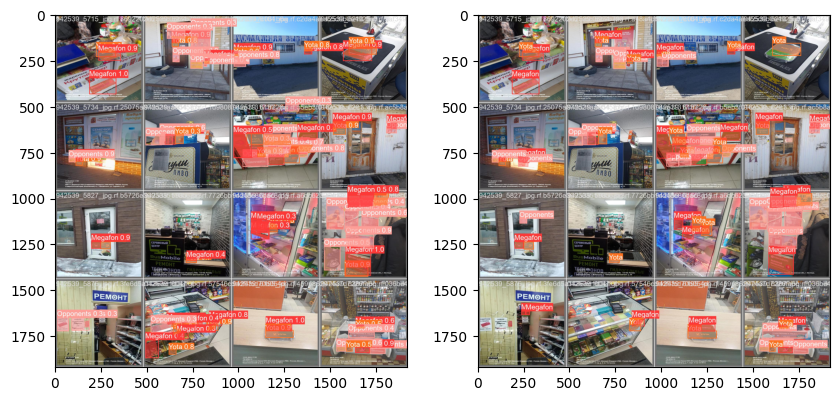

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 12))
ax[0].imshow(Image.open('/kaggle/working/runs/segment/train2/val_batch2_pred.jpg'))

ax[1].imshow(Image.open('/kaggle/working/runs/segment/train2/val_batch2_labels.jpg'))


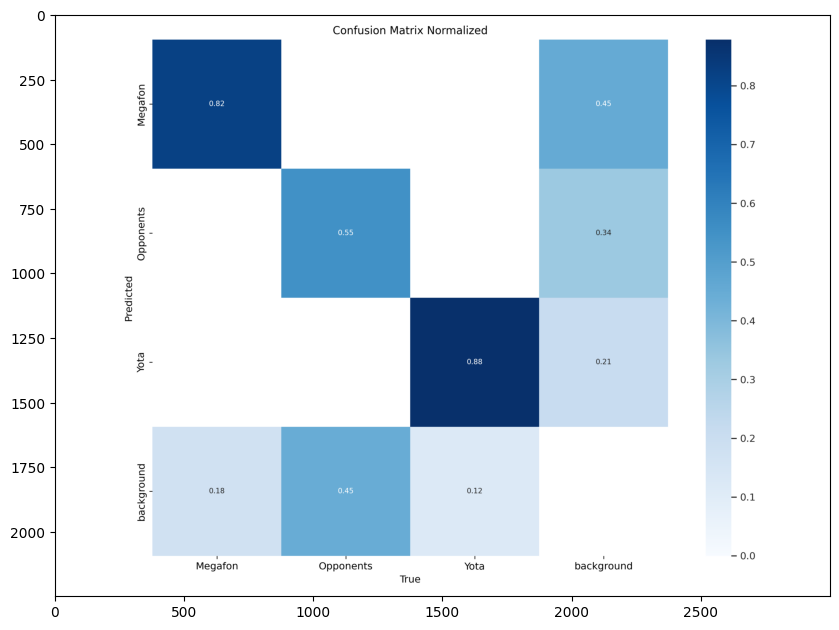

In [17]:
fig, ax = plt.subplots(figsize=(10, 12))
ax.imshow(Image.open('/kaggle/working/runs/segment/train2/confusion_matrix_normalized.png'))

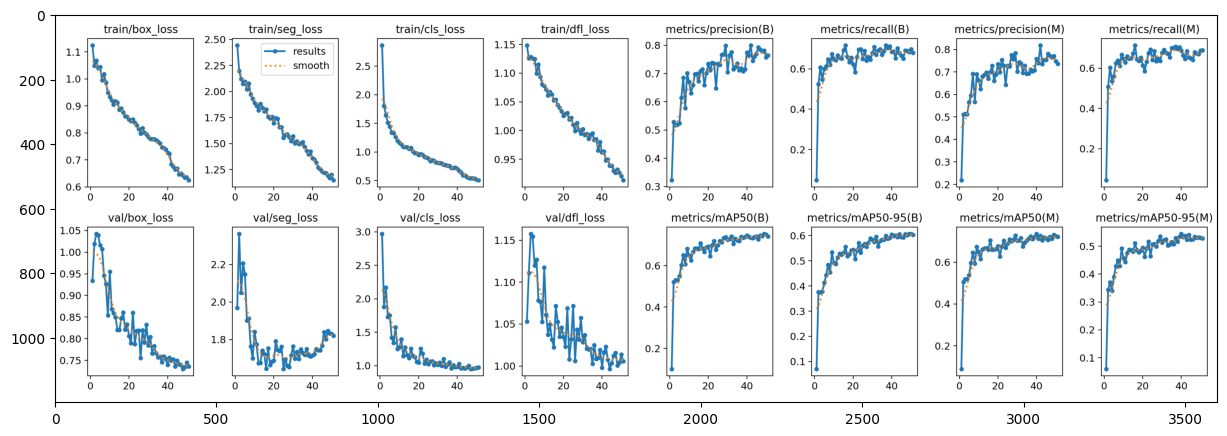

In [20]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(Image.open('/kaggle/working/runs/segment/train2/results.png'))

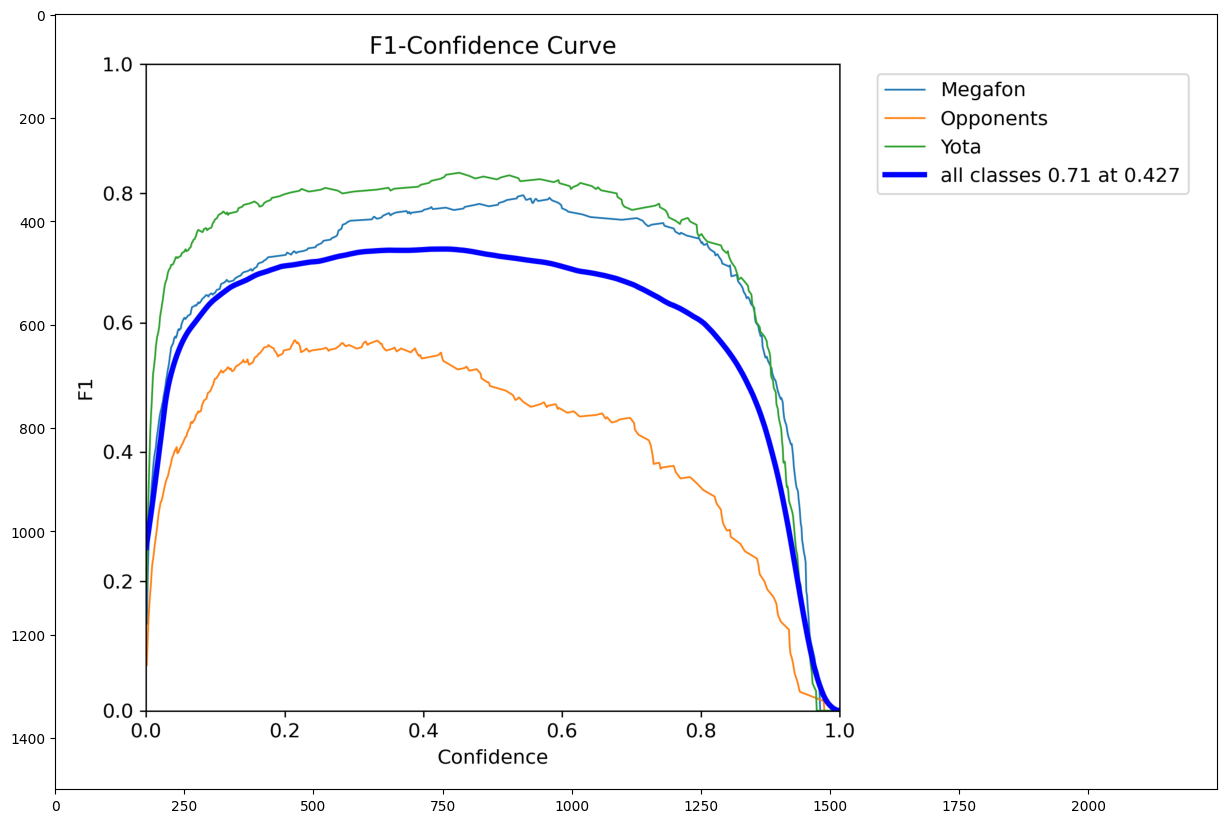

In [22]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(Image.open('/kaggle/working/runs/segment/train2/MaskF1_curve.png'))


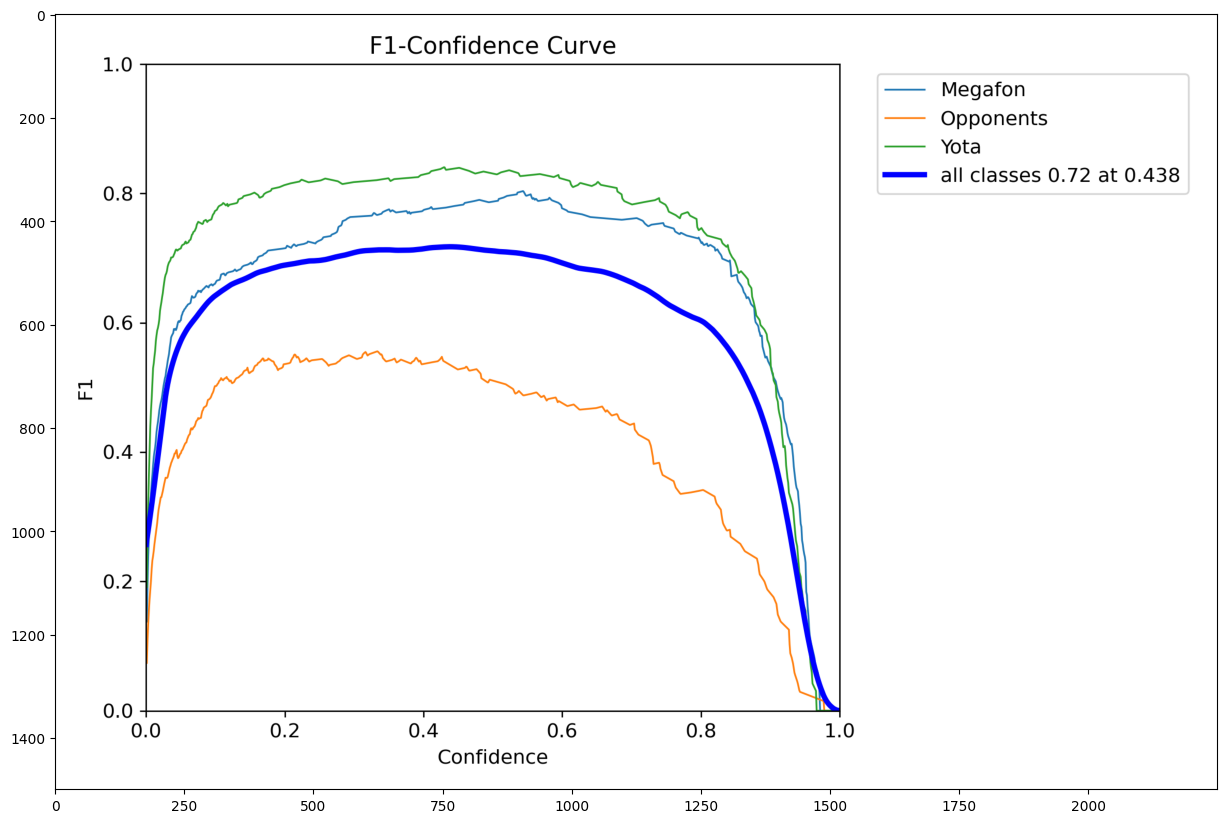

In [23]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(Image.open('/kaggle/working/runs/segment/train2/BoxF1_curve.png'))

# Export

In [24]:
# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.2.17 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients, 12.0 GFLOPs

PyTorch: starting from 'runs/segment/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 39, 8400), (1, 32, 160, 160)) (6.5 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 0.9s, saved as 'runs/segment/train2/weights/best.onnx' (12.6 MB)

Export complete (2.7s)
Results saved to /kaggle/working/runs/segment/train2/weights
Predict:         yolo predict task=segment model=runs/segment/train2/weights/best.onnx imgsz=640  
Validate:        yolo val task=segment model=runs/segment/train2/weights/best.onnx imgsz=640 data=/kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8/data.yaml  
Visualize:       https://netron.app


'runs/segment/train2/weights/best.onnx'

# Example

2



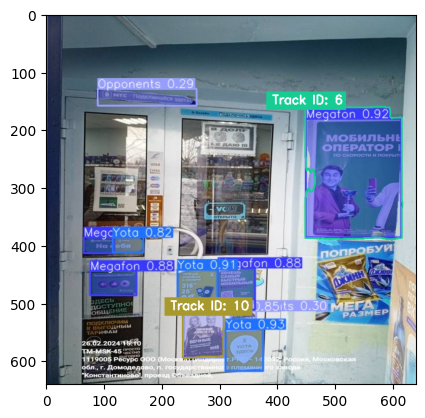

In [80]:
annotator = Annotator(im0, line_width=2)
results = model.track(im0, persist=True)
if (results[0].boxes.id is not None) and (results[0].masks is not None):
    masks = results[0].masks.xy
    print(len(masks))
    print()
    track_ids = results[0].boxes.id.int().cpu().tolist()
    for mask, track_id in zip(masks, track_ids):
        annotator.seg_bbox(mask=mask,
                           mask_color=colors(track_id, True),
                           track_label=str(track_id))

plt.imshow(im0)

# A comparison with task=detect prediction

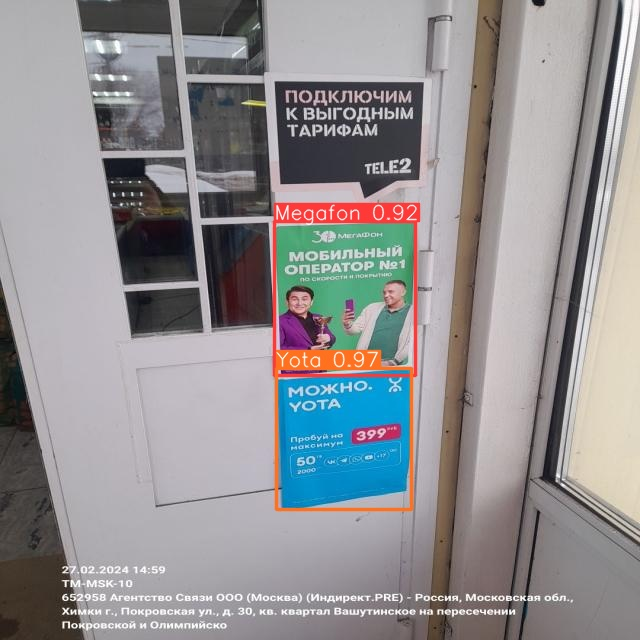

In [34]:
Image.open('/kaggle/working/runs/detect/predict/942539_1797_jpg.rf.aa8cbe59d3cd3824fb73cd4cc347c86f.jpg')